# Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

# Importing the data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submit = pd.read_csv('SampleSubmission.csv')
variable = pd.read_csv('VariableDefinitions.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
ID                        12079 non-null object
Policy Start Date         12079 non-null object
Policy End Date           12079 non-null object
Gender                    11720 non-null object
Age                       12079 non-null int64
First Transaction Date    12079 non-null object
No_Pol                    12079 non-null int64
Car_Category              8341 non-null object
Subject_Car_Colour        5117 non-null object
Subject_Car_Make          9603 non-null object
LGA_Name                  5603 non-null object
State                     5591 non-null object
ProductName               12079 non-null object
target                    12079 non-null int64
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
ID                        5177 non-null object
Policy Start Date         5177 non-null object
Policy End Date           5177 non-null object
Gender                    5021 non-null object
Age                       5177 non-null int64
First Transaction Date    5177 non-null object
No_Pol                    5177 non-null int64
Car_Category              3539 non-null object
Subject_Car_Colour        2172 non-null object
Subject_Car_Make          4116 non-null object
LGA_Name                  2395 non-null object
State                     2389 non-null object
ProductName               5177 non-null object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


In [5]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [6]:
submit.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [7]:
variable

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


## Combining the test and train data

In [8]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)

C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
Age                       17256 non-null int64
Car_Category              11880 non-null object
First Transaction Date    17256 non-null object
Gender                    16741 non-null object
ID                        17256 non-null object
LGA_Name                  7998 non-null object
No_Pol                    17256 non-null int64
Policy End Date           17256 non-null object
Policy Start Date         17256 non-null object
ProductName               17256 non-null object
State                     7980 non-null object
Subject_Car_Colour        7289 non-null object
Subject_Car_Make          13719 non-null object
target                    12079 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.8+ MB


In [10]:
data.head(10)

,Age,Car_Category,First Transaction Date,Gender,ID,LGA_Name,No_Pol,Policy End Date,Policy Start Date,ProductName,State,Subject_Car_Colour,Subject_Car_Make,target
0,30,Saloon,2010-05-14,Male,0040R73,NaN,1,2011-05-13,2010-05-14,Car Classic,NaN,Black,TOYOTA,0.0
1,79,JEEP,2010-11-29,Female,0046BNK,NaN,1,2011-11-28,2010-11-29,Car Classic,NaN,Grey,TOYOTA,1.0
2,43,Saloon,2010-03-21,Male,005QMC3,NaN,1,2011-03-20,2010-03-21,Car Classic,NaN,Red,TOYOTA,0.0
3,2,NaN,2010-08-21,Male,0079OHW,NaN,1,2011-08-20,2010-08-21,CarSafe,NaN,NaN,NaN,0.0
4,20,NaN,2010-08-29,Entity,00BRP63,Lagos,3,2010-12-31,2010-08-29,Muuve,Lagos,NaN,NaN,1.0
5,37,NaN,2010-10-21,Male,00D3EF6,NaN,2,2011-10-20,2010-10-21,Car Classic,NaN,NaN,NaN,0.0
6,40,NaN,2010-08-02,Female,00HHZ8Y,Ikeja,3,2011-08-01,2010-08-02,CVTP,Lagos,NaN,NaN,0.0
7,43,Saloon,2010-09-12,Male,00M1X6U,NaN,1,2011-09-11,2010-09-12,CarSafe,NaN,NaN,TOYOTA,0.0
8,71,JEEP,2010-07-06,Female,00N7XT1,Badagry,2,2011-07-05,2010-07-06,Car Classic,Benue,Black,REXTON,0.0
9,58,NaN,2010-12-18,Female,00QF156,Eti-Osa,1,2011-12-17,2010-12-18,Car Classic,Eti-Osa,NaN,NaN,0.0


In [11]:
data.isna().sum()

Age                          0
Car_Category              5376
First Transaction Date       0
Gender                     515
ID                           0
LGA_Name                  9258
No_Pol                       0
Policy End Date              0
Policy Start Date            0
ProductName                  0
State                     9276
Subject_Car_Colour        9967
Subject_Car_Make          3537
target                    5177
dtype: int64

In [12]:
data['Car_Category'].value_counts()


Saloon                     8612
JEEP                       2868
Truck                       135
Bus                          66
Mini Bus                     55
Pick Up                      45
Motorcycle                   24
Sedan                        19
Mini Van                     18
Wagon                        13
Shape Of Vehicle Chasis       8
Station 4 Wheel               7
Van                           5
Pick Up > 3 Tons              3
CAMRY CAR HIRE                1
Tipper Truck                  1
Name: Car_Category, dtype: int64

In [13]:
data['ProductName'].value_counts()

Car Classic         9264
CarSafe             5385
Customized Motor     786
CVTP                 681
Car Plus             672
CarFlex              253
Muuve                148
Motor Cycle           61
Car Vintage            6
Name: ProductName, dtype: int64

## Identifying the various column types

In [14]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]

In [15]:
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [16]:
one = list(data['Policy Start Date'])
two = list(data['First Transaction Date'])

check = []

for x in range(len(one)):
    check.append((one[x], two[x]))

In [17]:
check2 = []
for x in check:
    if x[0] != x[1]:
        check2.append(x[0])

In [18]:
len(check2)

0

### This means that the Policy start date and First transactional date are equal so we should drop one of them

In [19]:
data['Car_Category'].value_counts()

Saloon                     8612
JEEP                       2868
Truck                       135
Bus                          66
Mini Bus                     55
Pick Up                      45
Motorcycle                   24
Sedan                        19
Mini Van                     18
Wagon                        13
Shape Of Vehicle Chasis       8
Station 4 Wheel               7
Van                           5
Pick Up > 3 Tons              3
CAMRY CAR HIRE                1
Tipper Truck                  1
Name: Car_Category, dtype: int64

In [20]:

data['Car_Category'] = data['Car_Category'].fillna(value='Unknown')

data['Gender'] = data['Gender'].fillna(value='NOT STATED')

data['LGA_Name'] = data['LGA_Name'].fillna(value='Unknown')

data['State'] = data['State'].fillna(value='Unknown')

data['Subject_Car_Colour'] = data['Subject_Car_Colour'].fillna(value='Black')

data['Subject_Car_Make'] = data['Subject_Car_Make'].fillna(value='Unknown')

In [21]:
data.isna().sum()

Age                          0
Car_Category                 0
First Transaction Date       0
Gender                       0
ID                           0
LGA_Name                     0
No_Pol                       0
Policy End Date              0
Policy Start Date            0
ProductName                  0
State                        0
Subject_Car_Colour           0
Subject_Car_Make             0
target                    5177
dtype: int64

In [22]:
data['Car_Category'].value_counts()

Saloon                     8612
Unknown                    5376
JEEP                       2868
Truck                       135
Bus                          66
Mini Bus                     55
Pick Up                      45
Motorcycle                   24
Sedan                        19
Mini Van                     18
Wagon                        13
Shape Of Vehicle Chasis       8
Station 4 Wheel               7
Van                           5
Pick Up > 3 Tons              3
CAMRY CAR HIRE                1
Tipper Truck                  1
Name: Car_Category, dtype: int64

In [23]:
def convert(x):
    

    load = ['Tipper Truck', 'Pick Up > 3 Tons', 'Wagon', 'Van', 'Truck']
    people = ['Saloon', 'Motorcycle', 'JEEP', 'Mini Van', 'CAMRY CAR HIRE', 'Sedan', 'Bus', 'Mini Bus']
    both = ['Station 4 Wheel', 'Pick Up']
    body = ['Shape Of Vehicle Chasis']
    unknown = ['Unknown']
    
    if x in load:
        return 1.0
    elif x in people:
        return 2.0
    elif x in both:
        return 3.0
    elif x in body:
        return 4.0
    elif x in unknown:
        return 0.0

data['Cargo'] = data['Car_Category'].apply(convert)

In [24]:
def sizze(x):
    
    small = ['Motorcycle']
    medium = ['Saloon', 'Sedan', 'Shape Of Vehicle Chasis', 'CAMRY CAR HIRE', ]
    large = ['JEEP', 'Mini Van',  'Mini Bus', 'Pick Up', 'Wagon']
    extra_large = ['Van', 'Truck', 'Pick Up > 3 Tons', 'Tipper Truck', 'Bus', 'Station 4 Wheel']
    unknown = ['Unknown']
    
    if x in small:
        return 1.0
    if x in medium:
        return 2.0
    if x in large:
        return 3.0
    if x in extra_large:
        return 4.0
    
    if x in unknown:
        return 0.0
    
data['Size'] = data['Car_Category'].apply(sizze)

In [25]:
data['Size'].isna().sum()

0

In [26]:
data = pd.get_dummies(data, columns=['ProductName'])

# Categorical Encoder

In [27]:
# data.drop(['ID, First Transaction Date'], axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [30]:
cat_col = ['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State']

encoder = LabelEncoder()

for col in cat_col:
    
    data[col] = encoder.fit_transform(data[col])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 24 columns):
Age                             17256 non-null int64
Car_Category                    17256 non-null int32
First Transaction Date          17256 non-null object
Gender                          17256 non-null int32
ID                              17256 non-null int32
LGA_Name                        17256 non-null int32
No_Pol                          17256 non-null int64
Policy End Date                 17256 non-null object
Policy Start Date               17256 non-null object
State                           17256 non-null int32
Subject_Car_Colour              17256 non-null int32
Subject_Car_Make                17256 non-null int32
target                          12079 non-null float64
Cargo                           17256 non-null float64
Size                            17256 non-null float64
ProductName_CVTP                17256 non-null uint8
ProductName_Car Classic         17

In [32]:
# Convert to datatime features

data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data['Policy End Date'] = pd.to_datetime(data['Policy End Date'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 24 columns):
Age                             17256 non-null int64
Car_Category                    17256 non-null int32
First Transaction Date          17256 non-null object
Gender                          17256 non-null int32
ID                              17256 non-null int32
LGA_Name                        17256 non-null int32
No_Pol                          17256 non-null int64
Policy End Date                 17256 non-null datetime64[ns]
Policy Start Date               17256 non-null datetime64[ns]
State                           17256 non-null int32
Subject_Car_Colour              17256 non-null int32
Subject_Car_Make                17256 non-null int32
target                          12079 non-null float64
Cargo                           17256 non-null float64
Size                            17256 non-null float64
ProductName_CVTP                17256 non-null uint8
ProductName_Car Cl

# Feature Engineering

In [34]:
# Start
data['start day'] = data['Policy Start Date'].dt.day
data['start month'] = data['Policy Start Date'].dt.month
data['start year'] = data['Policy Start Date'].dt.year

# End
data['end day'] = data['Policy End Date'].dt.day
data['end month'] = data['Policy End Date'].dt.month
data['end year'] = data['Policy End Date'].dt.year

In [35]:
data['end year'].value_counts()

2011    16997
2010      250
2012        3
2041        2
2016        2
2037        1
2034        1
Name: end year, dtype: int64

In [36]:
data['start year'].value_counts()

2010    17241
2009        7
2006        2
2003        2
2007        1
2005        1
2002        1
2001        1
Name: start year, dtype: int64

In [37]:
# Caution

data['day'] = data['end day'] - data['start day']
data['month'] = data['end month'] - data['start month']
data['year'] = data['end year'] - data['start year']

#data.drop(['end day', 'end month', 'end year', 'start day', 'start year', 'start month'], axis=1, inplace=True)

In [38]:
data.head()

,Age,Car_Category,First Transaction Date,Gender,ID,LGA_Name,No_Pol,Policy End Date,Policy Start Date,State,...,ProductName_Muuve,start day,start month,start year,end day,end month,end year,day,month,year
0,30,8,2010-05-14,3,0,255,0,2011-05-13,2010-05-14,110,...,0,14,5,2010,13,5,2011,-1,0,1
1,79,2,2010-11-29,1,1,255,0,2011-11-28,2010-11-29,110,...,0,29,11,2010,28,11,2011,-1,0,1
2,43,8,2010-03-21,3,2,255,0,2011-03-20,2010-03-21,110,...,0,21,3,2010,20,3,2011,-1,0,1
3,2,14,2010-08-21,3,3,255,0,2011-08-20,2010-08-21,110,...,0,21,8,2010,20,8,2011,-1,0,1
4,20,14,2010-08-29,0,5,165,2,2010-12-31,2010-08-29,74,...,1,29,8,2010,31,12,2010,2,4,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 33 columns):
Age                             17256 non-null int64
Car_Category                    17256 non-null int32
First Transaction Date          17256 non-null object
Gender                          17256 non-null int32
ID                              17256 non-null int32
LGA_Name                        17256 non-null int32
No_Pol                          17256 non-null int64
Policy End Date                 17256 non-null datetime64[ns]
Policy Start Date               17256 non-null datetime64[ns]
State                           17256 non-null int32
Subject_Car_Colour              17256 non-null int32
Subject_Car_Make                17256 non-null int32
target                          12079 non-null float64
Cargo                           17256 non-null float64
Size                            17256 non-null float64
ProductName_CVTP                17256 non-null uint8
ProductName_Car Cl

In [40]:
data.drop(['First Transaction Date', 'Policy End Date', 'Policy Start Date', 'LGA_Name', 'ID'], axis=1, inplace=True)

# Exploratory Data Analysis

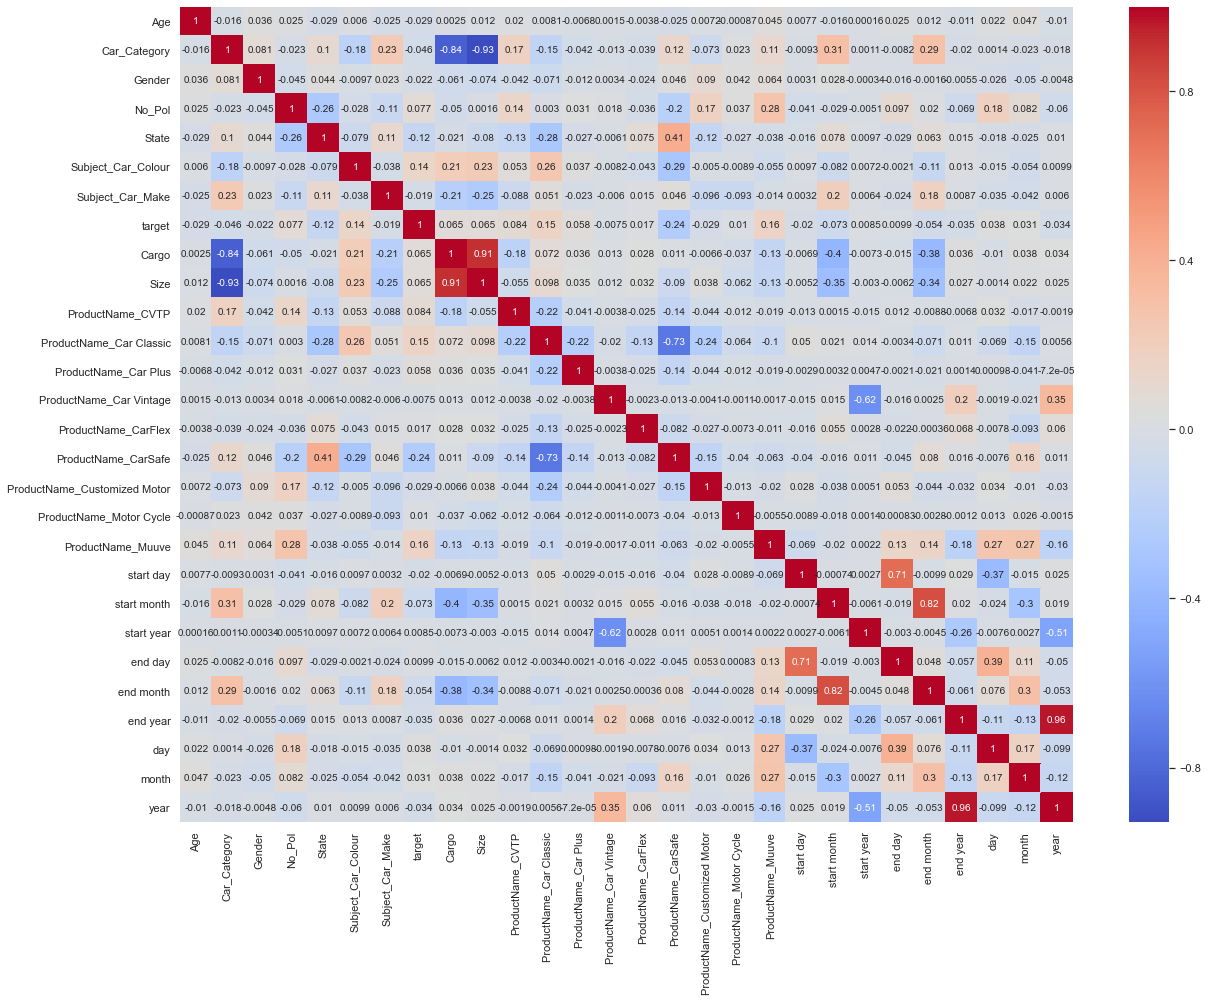

In [41]:
plt.figure(figsize=(20,15))

sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [42]:
data.head(10)

,Age,Car_Category,Gender,No_Pol,State,Subject_Car_Colour,Subject_Car_Make,target,Cargo,Size,...,ProductName_Muuve,start day,start month,start year,end day,end month,end year,day,month,year
0,30,8,3,0,110,4,68,0.0,2.0,2.0,...,0,14,5,2010,13,5,2011,-1,0,1
1,79,2,1,0,110,26,68,1.0,2.0,3.0,...,0,29,11,2010,28,11,2011,-1,0,1
2,43,8,3,0,110,32,68,0.0,2.0,2.0,...,0,21,3,2010,20,3,2011,-1,0,1
3,2,14,3,0,110,4,70,0.0,0.0,0.0,...,0,21,8,2010,20,8,2011,-1,0,1
4,20,14,0,2,74,4,70,1.0,0.0,0.0,...,1,29,8,2010,31,12,2010,2,4,0
5,37,14,3,1,110,4,70,0.0,0.0,0.0,...,0,21,10,2010,20,10,2011,-1,0,1
6,40,14,1,2,74,4,70,0.0,0.0,0.0,...,0,2,8,2010,1,8,2011,-1,0,1
7,43,8,3,0,110,4,68,0.0,2.0,2.0,...,0,12,9,2010,11,9,2011,-1,0,1
8,71,2,1,1,23,4,58,0.0,2.0,3.0,...,0,6,7,2010,5,7,2011,-1,0,1
9,58,14,1,0,39,4,70,0.0,0.0,0.0,...,0,18,12,2010,17,12,2011,-1,0,1


In [43]:
train = data.iloc[0:12079, :]
test = data.iloc[12079:, :].drop('target', axis=1)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 28 columns):
Age                             12079 non-null int64
Car_Category                    12079 non-null int32
Gender                          12079 non-null int32
No_Pol                          12079 non-null int64
State                           12079 non-null int32
Subject_Car_Colour              12079 non-null int32
Subject_Car_Make                12079 non-null int32
target                          12079 non-null float64
Cargo                           12079 non-null float64
Size                            12079 non-null float64
ProductName_CVTP                12079 non-null uint8
ProductName_Car Classic         12079 non-null uint8
ProductName_Car Plus            12079 non-null uint8
ProductName_Car Vintage         12079 non-null uint8
ProductName_CarFlex             12079 non-null uint8
ProductName_CarSafe             12079 non-null uint8
ProductName_Customized Motor    12079

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 12079 to 17255
Data columns (total 27 columns):
Age                             5177 non-null int64
Car_Category                    5177 non-null int32
Gender                          5177 non-null int32
No_Pol                          5177 non-null int64
State                           5177 non-null int32
Subject_Car_Colour              5177 non-null int32
Subject_Car_Make                5177 non-null int32
Cargo                           5177 non-null float64
Size                            5177 non-null float64
ProductName_CVTP                5177 non-null uint8
ProductName_Car Classic         5177 non-null uint8
ProductName_Car Plus            5177 non-null uint8
ProductName_Car Vintage         5177 non-null uint8
ProductName_CarFlex             5177 non-null uint8
ProductName_CarSafe             5177 non-null uint8
ProductName_Customized Motor    5177 non-null uint8
ProductName_Motor Cycle         5177 non-null uint8


In [46]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']

In [47]:
X_train.shape, y_train.shape

((12079, 27), (12079,))

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [49]:
#X_train = StandardScaler().fit_transform(X_train)
#test = StandardScaler().fit_transform(test)

# Models

In [50]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [51]:
'''from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)

for train_index, test_index in ss.split(X_train, y_train):
    X_train, X_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = y_train.iloc[train_index], y_train.iloc[test_index]'''

'from sklearn.model_selection import StratifiedShuffleSplit\n\nss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)\n\nfor train_index, test_index in ss.split(X_train, y_train):\n    X_train, X_test = X_train.iloc[train_index], X_train.iloc[test_index]\n    y_train, y_test = y_train.iloc[train_index], y_train.iloc[test_index]'

In [52]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)


pred = model.predict(test)

In [53]:
from sklearn.metrics import f1_score

In [54]:
submit.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [55]:
submit.target = pred

In [56]:
submit.head()

,ID,target
0,009D84L,1.0
1,01DO2EQ,0.0
2,01QM0NU,0.0
3,024NJLZ,0.0
4,02BYET3,1.0


In [57]:
ss = submit.copy()

In [58]:
ss.to_csv('5th submission.csv', index=False)